In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

In [4]:
#load the data 
tgt_df = pd.read_csv('TGT_14_22.csv')

In [5]:
tgt_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-03,63.619999,63.889999,63.400002,63.490002,49.632183,4589400
1,2014-01-06,63.680000,63.689999,62.669998,63.060001,49.296040,4609600
2,2014-01-07,63.029999,63.290001,62.599998,62.910000,49.178783,5398300
3,2014-01-08,62.810001,62.820000,62.430000,62.689999,49.006805,5529900
4,2014-01-09,62.889999,63.590000,62.770000,63.340000,49.514927,7264600


In [6]:
#Inspect it 
print(tgt_df)

            Date        Open        High         Low       Close   Adj Close  \
0     2014-01-03   63.619999   63.889999   63.400002   63.490002   49.632183   
1     2014-01-06   63.680000   63.689999   62.669998   63.060001   49.296040   
2     2014-01-07   63.029999   63.290001   62.599998   62.910000   49.178783   
3     2014-01-08   62.810001   62.820000   62.430000   62.689999   49.006805   
4     2014-01-09   62.889999   63.590000   62.770000   63.340000   49.514927   
...          ...         ...         ...         ...         ...         ...   
2168  2022-08-15  171.830002  174.160004  170.199997  173.389999  172.309998   
2169  2022-08-16  177.110001  183.889999  175.559998  180.190002  180.190002   
2170  2022-08-17  174.160004  177.990005  170.830002  175.339996  175.339996   
2171  2022-08-18  173.979996  175.139999  171.580002  173.050003  173.050003   
2172  2022-08-19  171.830002  171.919998  166.789993  167.039993  167.039993   

        Volume  
0      4589400  
1    

In [7]:
#print the summary 
print(tgt_df.describe())

              Open         High          Low        Close    Adj Close  \
count  2173.000000  2173.000000  2173.000000  2173.000000  2173.000000   
mean    106.706917   107.825150   105.611233   106.717865    98.755860   
std      58.499377    59.140570    57.889271    58.499835    60.905127   
min      50.230000    50.779999    48.560001    50.180000    43.050007   
25%      68.620003    69.290001    68.000000    68.680000    58.440788   
50%      78.779999    79.459999    78.180000    78.879997    67.386223   
75%     125.010002   125.930000   123.930000   125.029999   119.282143   
max     264.549988   268.980011   262.739990   266.390015   262.506409   

             Volume  
count  2.173000e+03  
mean   5.265282e+06  
std    3.662838e+06  
min    1.097700e+06  
25%    3.369800e+06  
50%    4.396200e+06  
75%    6.017900e+06  
max    5.093680e+07  


In [8]:
#now prep the data for 2014-2019
tgt_df.set_index(pd.DatetimeIndex(tgt_df['Date']), inplace=True)

In [9]:
#Keep the close for 2014-19
tgt_df = tgt_df[['Close']]

In [10]:
print(tgt_df)

                 Close
Date                  
2014-01-03   63.490002
2014-01-06   63.060001
2014-01-07   62.910000
2014-01-08   62.689999
2014-01-09   63.340000
...                ...
2022-08-15  173.389999
2022-08-16  180.190002
2022-08-17  175.339996
2022-08-18  173.050003
2022-08-19  167.039993

[2173 rows x 1 columns]


In [11]:
print (tgt_df.index.max())

2022-08-19 00:00:00


In [12]:

data_14_22 = tgt_df.filter(['Close'])
dataset_14_22 = data_14_22.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_14_22)

training_data_len =math.ceil(len(dataset_14_22) *.7)
train_data =scaled_data[0:training_data_len , : ]


X_train_data = []
y_train_data = []

for i in range(1500,len(train_data)):
    X_train_data=list(X_train_data)
    y_train_data=list(y_train_data)
    X_train_data.append(train_data[i-1500:i,0])
    y_train_data.append(train_data[i,0])
    
    X_train_data1, y_train_data1 = np.array(X_train_data), np.array(y_train_data)
    
    X_train_data2 = np.reshape(X_train_data1,(X_train_data1.shape[0],X_train_data1.shape[1],1))

   
    
#1500 = number of days you can change it accordingly. 

# There will be a total of 60 values, 1st column will contain an index of 0-59
# The second will have an index of 1-60 ++_
# the y_train has the 60 st value on c1 and c2 will have 61++

In [13]:
#Lets build the LSTM MODEL 

model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_data2.shape[1],1)))

model.add(LSTM(units=50, return_sequences=False))

model.add(Dense(units=25))

model.add(Dense(units=1))


#okay this example will have 2 LSTM layers w/50 neurons and 2 dense layers
# plust one with 25 nuerons 

2022-08-24 17:49:18.904000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# Comple the model 

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_data2, y_train_data1, batch_size=1, epochs=1)

22/22 [==============================] - 16s 593ms/step - loss: 0.0094


In [15]:
test_data = scaled_data[training_data_len -1500: , : ]

X_test = []

y_test = dataset_14_22[training_data_len : , : ]

for i in range(1500,len(test_data)):
    
    X_test.append(test_data[i-1500:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)


21/21 [==============================] - 5s 202ms/step


In [16]:
# Error calculation where RMSE = root mean squared error 

rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [17]:
print(rmse)

24.23455525200296


In [18]:
#OOOF okay the lower the value is to 0 the better
# it indicates that the models p-value match the actual values from the data set 
# which in this case it does not. 

/Users/dashickscott/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


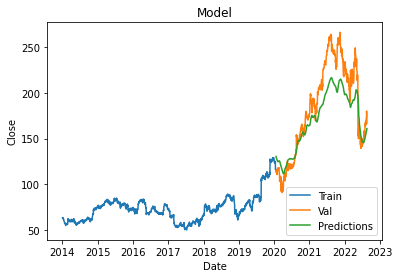

In [19]:
#Predict and visualize 

train = tgt_df[:training_data_len]

valid = tgt_df[training_data_len:]

valid['Predictions'] = predictions

plt.title('Model')

plt.xlabel('Date')

plt.ylabel('Close')

plt.plot(train['Close'])

plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()


<AxesSubplot:xlabel='Date'>

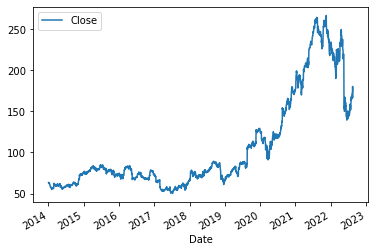

In [20]:
tgt_df.plot()

In [21]:
train['Close']

Date
2014-01-03     63.490002
2014-01-06     63.060001
2014-01-07     62.910000
2014-01-08     62.689999
2014-01-09     63.340000
                 ...    
2020-01-14    125.260002
2020-01-15    117.000000
2020-01-16    116.320000
2020-01-17    116.919998
2020-01-21    114.040001
Name: Close, Length: 1522, dtype: float64

In [22]:
valid[['Close', 'Predictions']]

,Close,Predictions
Date,,
2020-01-22,113.900002,130.468658
2020-01-23,115.529999,129.832062
2020-01-24,114.320000,129.217880
2020-01-27,115.779999,128.616547
2020-01-28,115.440002,128.076782
...,...,...
2022-08-15,173.389999,157.992584
2022-08-16,180.190002,158.681534
2022-08-17,175.339996,159.504425


In [23]:
complete_df = pd.concat([train[['Close']], valid[['Close', 'Predictions']]])
complete_df

,Close,Predictions
Date,,
2014-01-03,63.490002,NaN
2014-01-06,63.060001,NaN
2014-01-07,62.910000,NaN
2014-01-08,62.689999,NaN
2014-01-09,63.340000,NaN
...,...,...
2022-08-15,173.389999,157.992584
2022-08-16,180.190002,158.681534
2022-08-17,175.339996,159.504425


In [24]:
complete_df2 = complete_df.dropna()

print(complete_df2)

                 Close  Predictions
Date                               
2020-01-22  113.900002   130.468658
2020-01-23  115.529999   129.832062
2020-01-24  114.320000   129.217880
2020-01-27  115.779999   128.616547
2020-01-28  115.440002   128.076782
...                ...          ...
2022-08-15  173.389999   157.992584
2022-08-16  180.190002   158.681534
2022-08-17  175.339996   159.504425
2022-08-18  173.050003   160.307892
2022-08-19  167.039993   161.013962

[651 rows x 2 columns]


In [26]:
complete_df2.to_csv('AP_TNG.csv', index=False)